Plot saved as 'figure8_result_plot_all_conditions.png'.


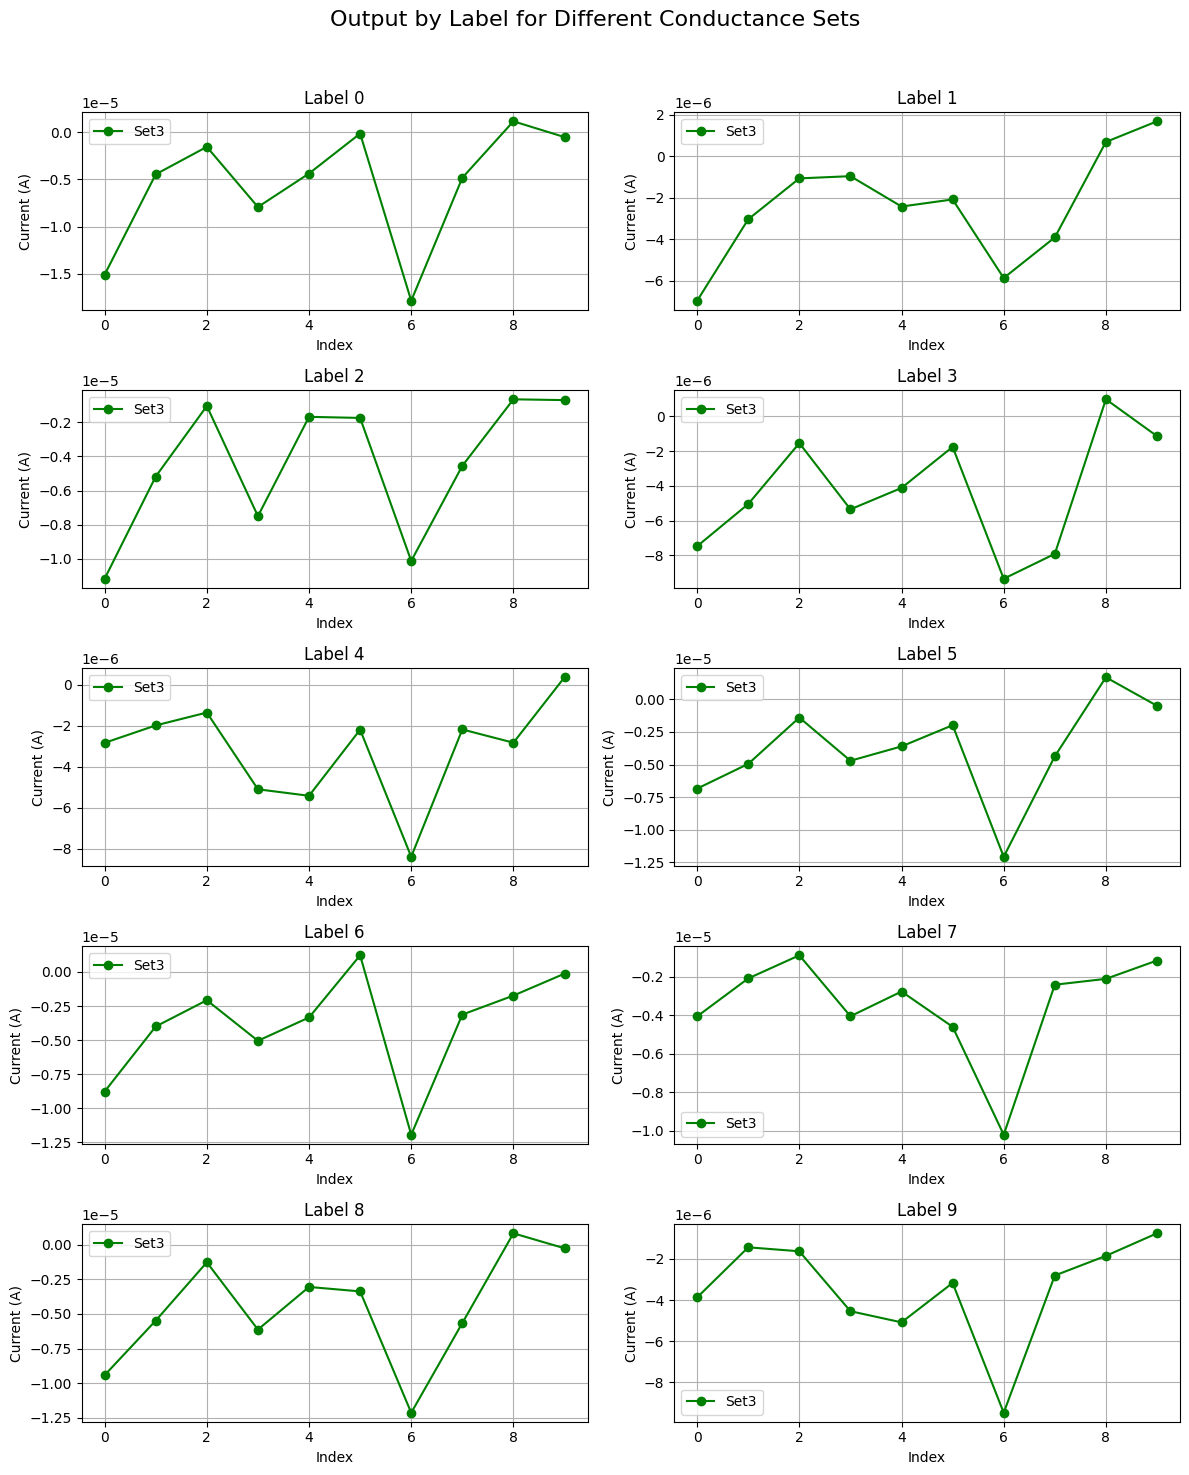

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
weights_file = 'fc3_weights.csv'
vred_mapping_file = 'vred_mapping_testset_v3.csv'

# 가중치 데이터 로드
weights = np.loadtxt(weights_file, delimiter=',')

# 전압 데이터 로드
voltage_data_df = pd.read_csv(vred_mapping_file, header=None)
labels = voltage_data_df.iloc[0, :]  # 첫 번째 행은 라벨
voltage_values = voltage_data_df.iloc[1:, :].astype(float)  # 나머지 행은 전압 값

# G_max, G_min 조건 및 색상 지정
conductance_conditions = [
   # (0.00128, 0.000000569, 'Set1', 'r'),  # (G_max, G_min, label, color)
   # (0.000003169003, 0.0000006706055, 'Set2', 'b'),
    (0.00008996992, 0.0000005695797, 'Set3', 'g')
]

# 각 조건별 결과 저장용 딕셔너리
all_label_mean_currents = {}

# 각 조건에 대해 반복
for G_max, G_min, set_label, color in conductance_conditions:
    # 가중치 정규화 및 컨덕턴스 계산
    W_positive = np.maximum(weights, 0)
    W_negative = -np.minimum(weights, 0)

    max_abs_weight = np.max(np.abs(weights))
    W_norm_positive = W_positive / max_abs_weight
    W_norm_negative = W_negative / max_abs_weight

    G_positive = W_norm_positive * (G_max - G_min) + G_min
    G_negative = W_norm_negative * (G_max - G_min) + G_min

    # 전류 계산
    label_outputs = {i: [] for i in range(10)}  # 각 라벨의 결과 저장
    for col_idx in range(voltage_values.shape[1]):
        label = int(labels[col_idx])  # 현재 열의 라벨
        voltage_column = voltage_values.iloc[:, col_idx].values  # 열 데이터
        voltage_column = voltage_column[np.newaxis, :]  # (1, 64)로 크기 조정

        # Positive, Negative, Net Current 계산
        positive_current = np.sum(voltage_column * G_positive, axis=1)
        negative_current = np.sum(voltage_column * G_negative, axis=1)
        net_current = positive_current - negative_current

        label_outputs[label].append(net_current)

    # 각 라벨별 평균 전류 계산
    label_mean_currents = {}
    for label in range(10):
        if label_outputs[label]:
            label_mean_currents[label] = np.mean(label_outputs[label], axis=0)

    all_label_mean_currents[set_label] = (label_mean_currents, color)

# 결과를 플롯
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
fig.suptitle('Output by Label for Different Conductance Sets', fontsize=16)

for label in range(10):
    ax = axes[label // 2, label % 2]
    x_indices = range(len(list(all_label_mean_currents.values())[0][0][label]))

    for set_label, (mean_currents, color) in all_label_mean_currents.items():
        if label in mean_currents:
            avg_output = mean_currents[label]
            ax.plot(
                x_indices, avg_output, marker='o', label=set_label, color=color
            )

    ax.set_title(f'Label {label}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Current (A)')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
output_plot_path = 'figure8_result_plot_all_conditions.png'
plt.savefig(output_plot_path)
print(f"Plot saved as '{output_plot_path}'.")


Plot saved as 'figure8_result_plot_set3.png'.


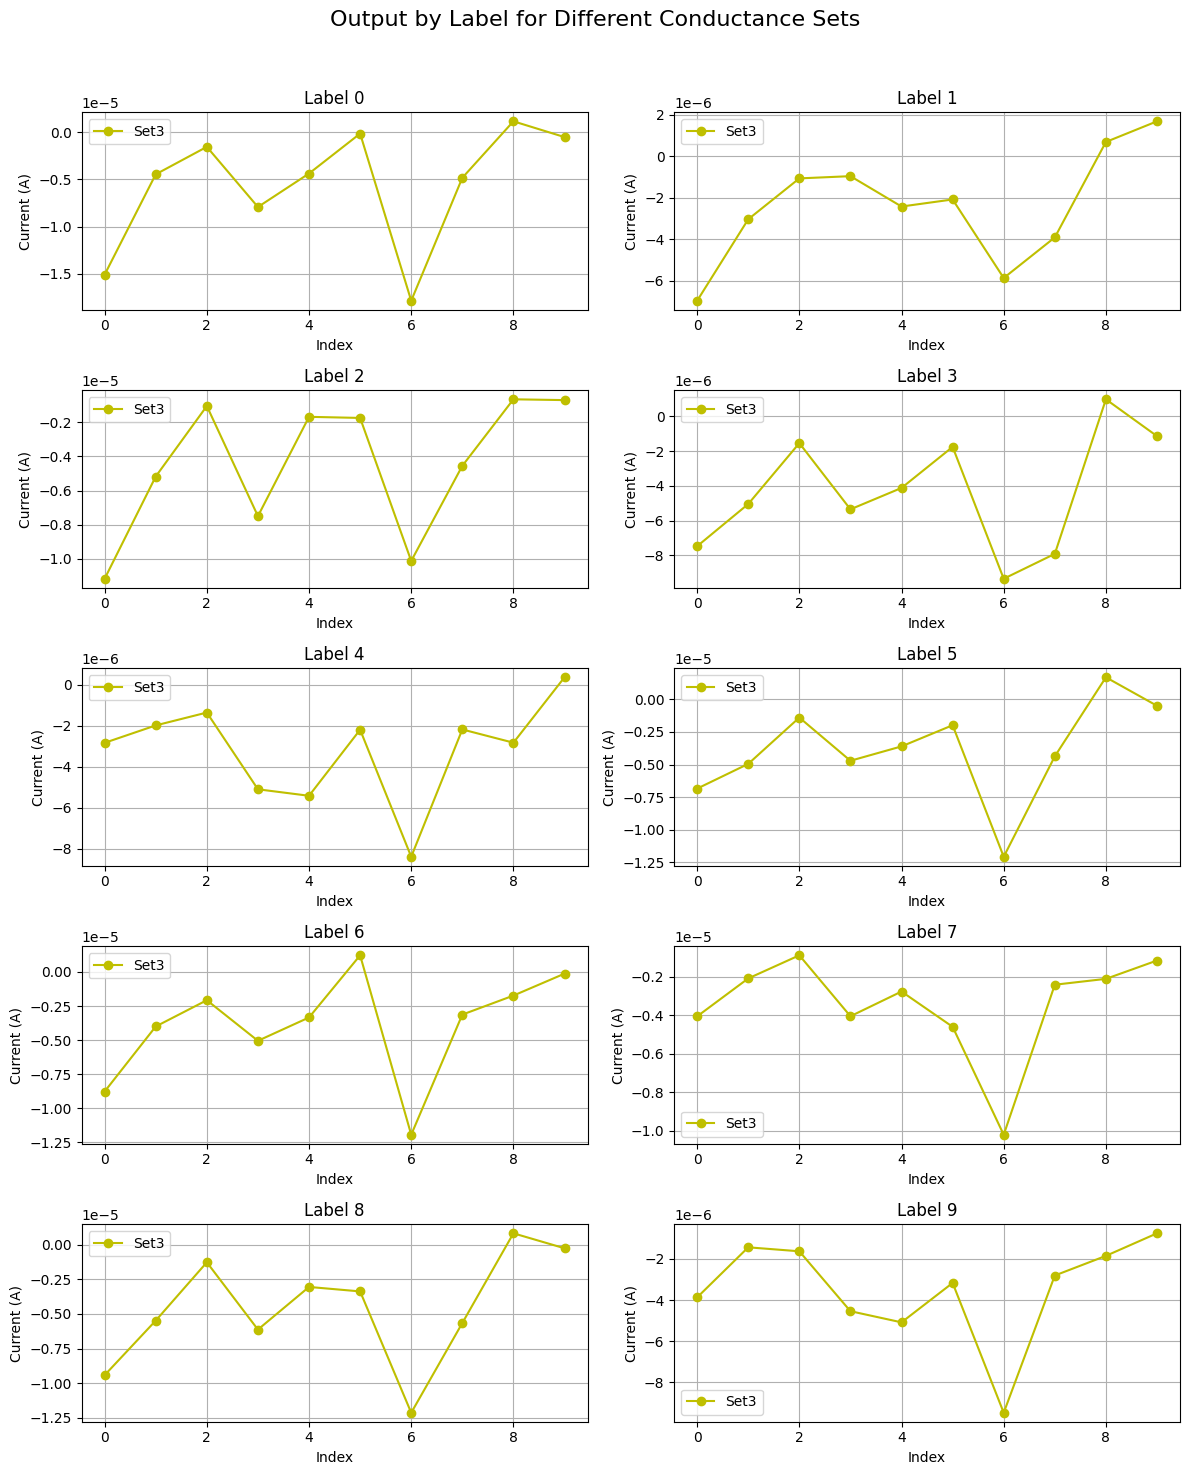

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
weights_file = 'fc3_weights.csv'
vred_mapping_file = 'vred_mapping_testset_v3.csv'

# 가중치 데이터 로드
weights = np.loadtxt(weights_file, delimiter=',')

# 전압 데이터 로드
voltage_data_df = pd.read_csv(vred_mapping_file, header=None)
labels = voltage_data_df.iloc[0, :]  # 첫 번째 행은 라벨
voltage_values = voltage_data_df.iloc[1:, :].astype(float)  # 나머지 행은 전압 값

# G_max, G_min 조건 및 색상 지정
conductance_conditions = [
    (0.00128, 0.000000569, 'Set1', 'b'), 
    (0.000003169003, 0.0000006706055, 'Set2', 'k'),
    (0.00008996992, 0.0000005695797, 'Set3', 'y')
]

# 각 조건별 결과 저장용 딕셔너리
all_label_mean_currents = {}

# 각 조건에 대해 반복
for G_max, G_min, set_label, color in conductance_conditions:
    # 가중치 정규화 및 컨덕턴스 계산
    W_positive = np.maximum(weights, 0)
    W_negative = -np.minimum(weights, 0)

    max_abs_weight = np.max(np.abs(weights))
    W_norm_positive = W_positive / max_abs_weight
    W_norm_negative = W_negative / max_abs_weight

    G_positive = W_norm_positive * (G_max - G_min) + G_min
    G_negative = W_norm_negative * (G_max - G_min) + G_min

    # 전류 계산
    label_outputs = {i: [] for i in range(10)}  # 각 라벨의 결과 저장
    for col_idx in range(voltage_values.shape[1]):
        label = int(labels[col_idx])  # 현재 열의 라벨
        voltage_column = voltage_values.iloc[:, col_idx].values  # 열 데이터
        voltage_column = voltage_column[np.newaxis, :]  # (1, 64)로 크기 조정

        # Positive, Negative, Net Current 계산
        positive_current = np.sum(voltage_column * G_positive, axis=1)
        negative_current = np.sum(voltage_column * G_negative, axis=1)
        net_current = positive_current - negative_current

        label_outputs[label].append(net_current)

    # 각 라벨별 평균 전류 계산
    label_mean_currents = {}
    for label in range(10):
        if label_outputs[label]:
            label_mean_currents[label] = np.mean(label_outputs[label], axis=0)

    all_label_mean_currents[set_label] = (label_mean_currents, color)

# 결과를 플롯
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
fig.suptitle('Output by Label for Different Conductance Sets', fontsize=16)

for label in range(10):
    ax = axes[label // 2, label % 2]
    x_indices = range(len(list(all_label_mean_currents.values())[0][0][label]))

    for set_label, (mean_currents, color) in all_label_mean_currents.items():
        if label in mean_currents:
            avg_output = mean_currents[label]
            ax.plot(
                x_indices, avg_output, marker='o', label=set_label, color=color
            )

    ax.set_title(f'Label {label}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Current (A)')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
output_plot_path = 'figure8_result_plot_set3.png'
plt.savefig(output_plot_path)
print(f"Plot saved as '{output_plot_path}'.")
